In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns
from scipy.stats import kstest, uniform, norm, t
from scipy.special import gamma
import matplotlib.pyplot as plt
from numpy.linalg import det, inv

Uploading prepared CDS spread weekly differences

In [2]:
df = pd.read_csv('CDS_spreads_5Y.csv')
names = df.columns[2:len(df.columns)]
df = df[names]

### Contents:
    1. Quantile transform by Python
    2. KDE by Matlab
    3. Maximum Loglikehood for t copula density

### 1. Quantile transform by Python

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


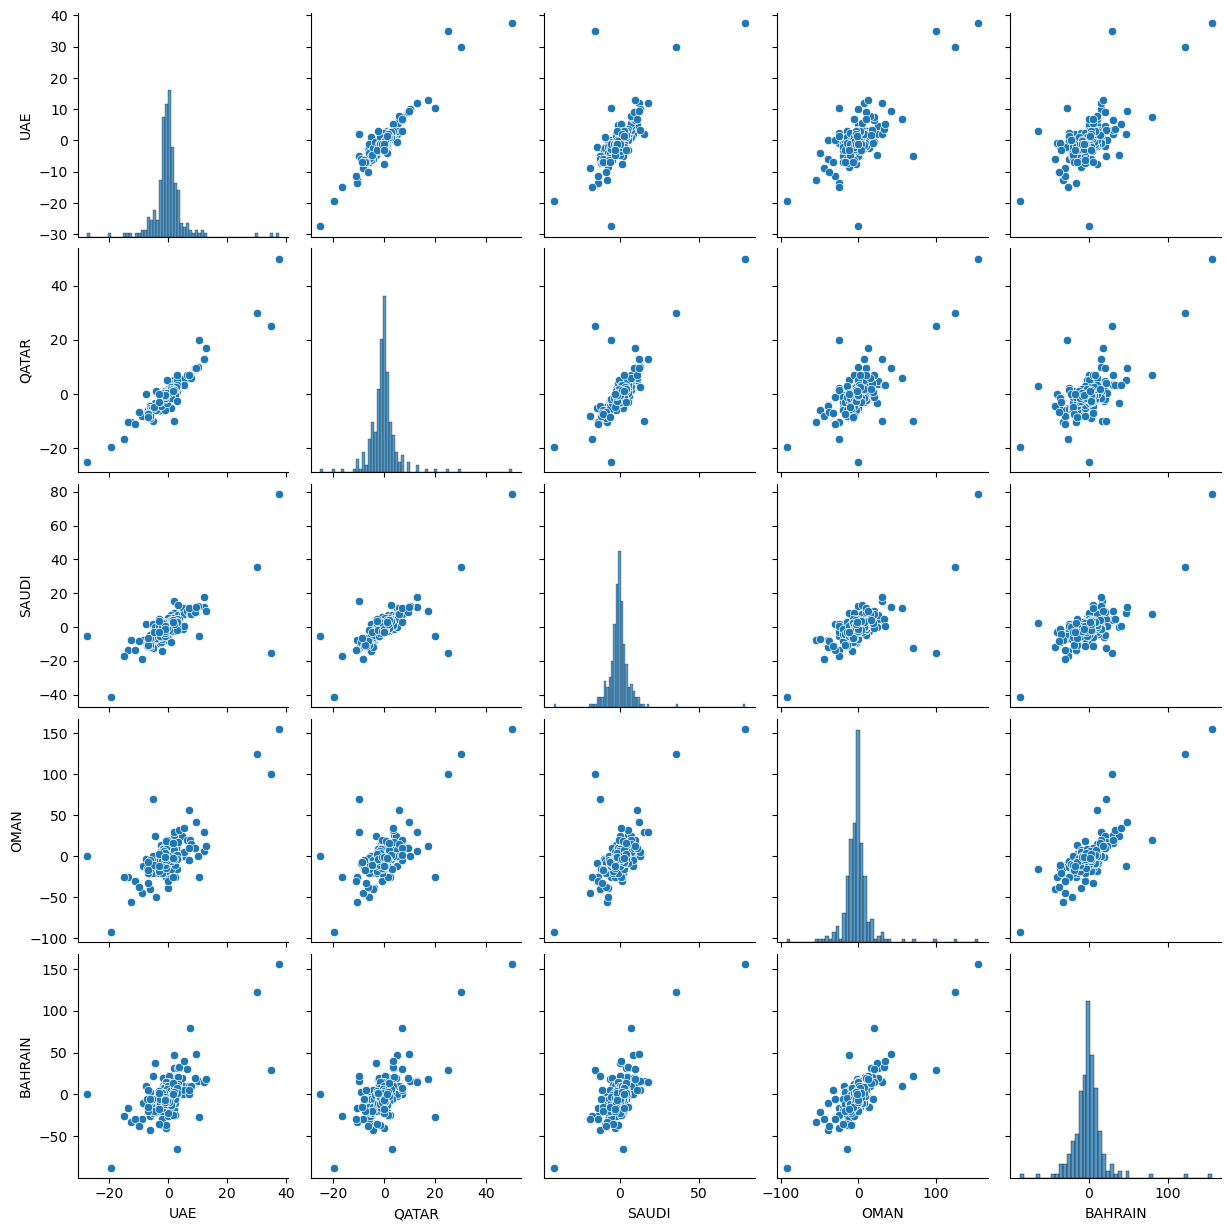

In [3]:
sns.pairplot(df)

In [4]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
U_QT = pd.DataFrame(columns = names)

for i in names:
    U_QT[i] = np.concatenate(trans.fit_transform(np.array(df[i]).reshape(-1, 1)))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


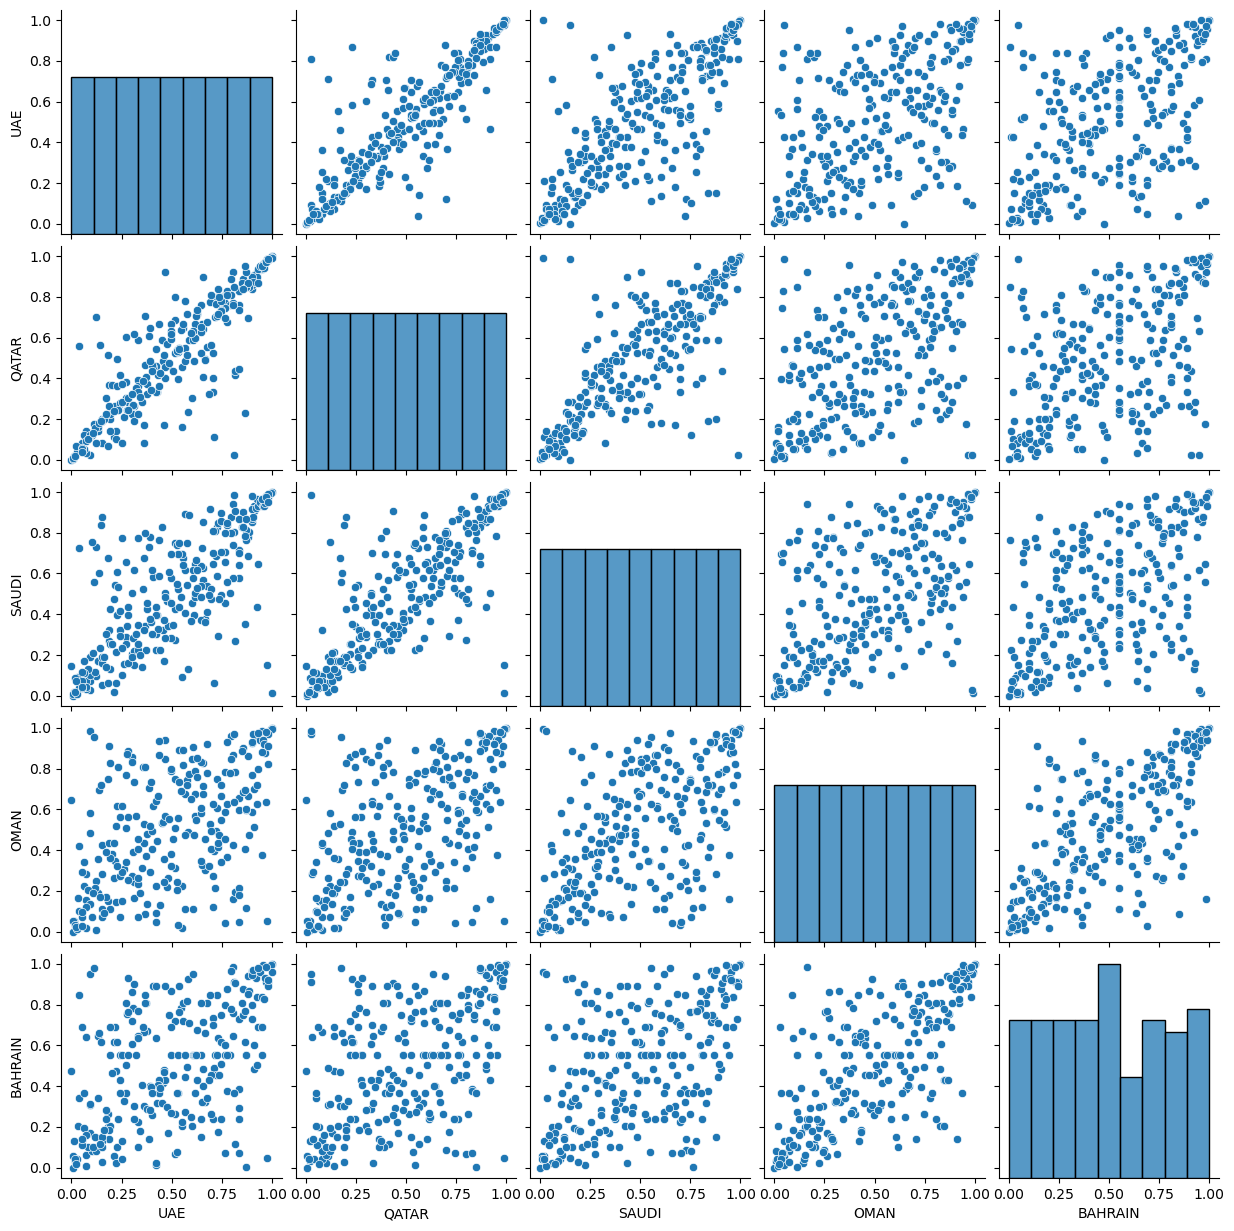

In [5]:
sns.pairplot(U_QT)

In [6]:
# Check whether kstest proves their uniform distribution
for i in names:
    print(kstest(U_QT[i], uniform(loc=0.0, scale=1).cdf))

KstestResult(statistic=0.01298239571873383, pvalue=0.9999999999671673, statistic_location=0.8383792211155592, statistic_sign=-1)
KstestResult(statistic=0.013232814257847725, pvalue=0.9999999999158045, statistic_location=0.14152909050405704, statistic_sign=1)
KstestResult(statistic=0.01226507417993783, pvalue=0.9999999999983913, statistic_location=0.7979793598942235, statistic_sign=-1)
KstestResult(statistic=0.012987012286390084, pvalue=0.9999999999665761, statistic_location=0.050505051205673404, statistic_sign=1)
KstestResult(statistic=0.044733044733044625, pvalue=0.6772262343983992, statistic_location=0.5505050505050506, statistic_sign=1)


In [7]:
Norm_QT = norm.ppf(U_QT)
Norm_QT = pd.DataFrame(Norm_QT, columns = names)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


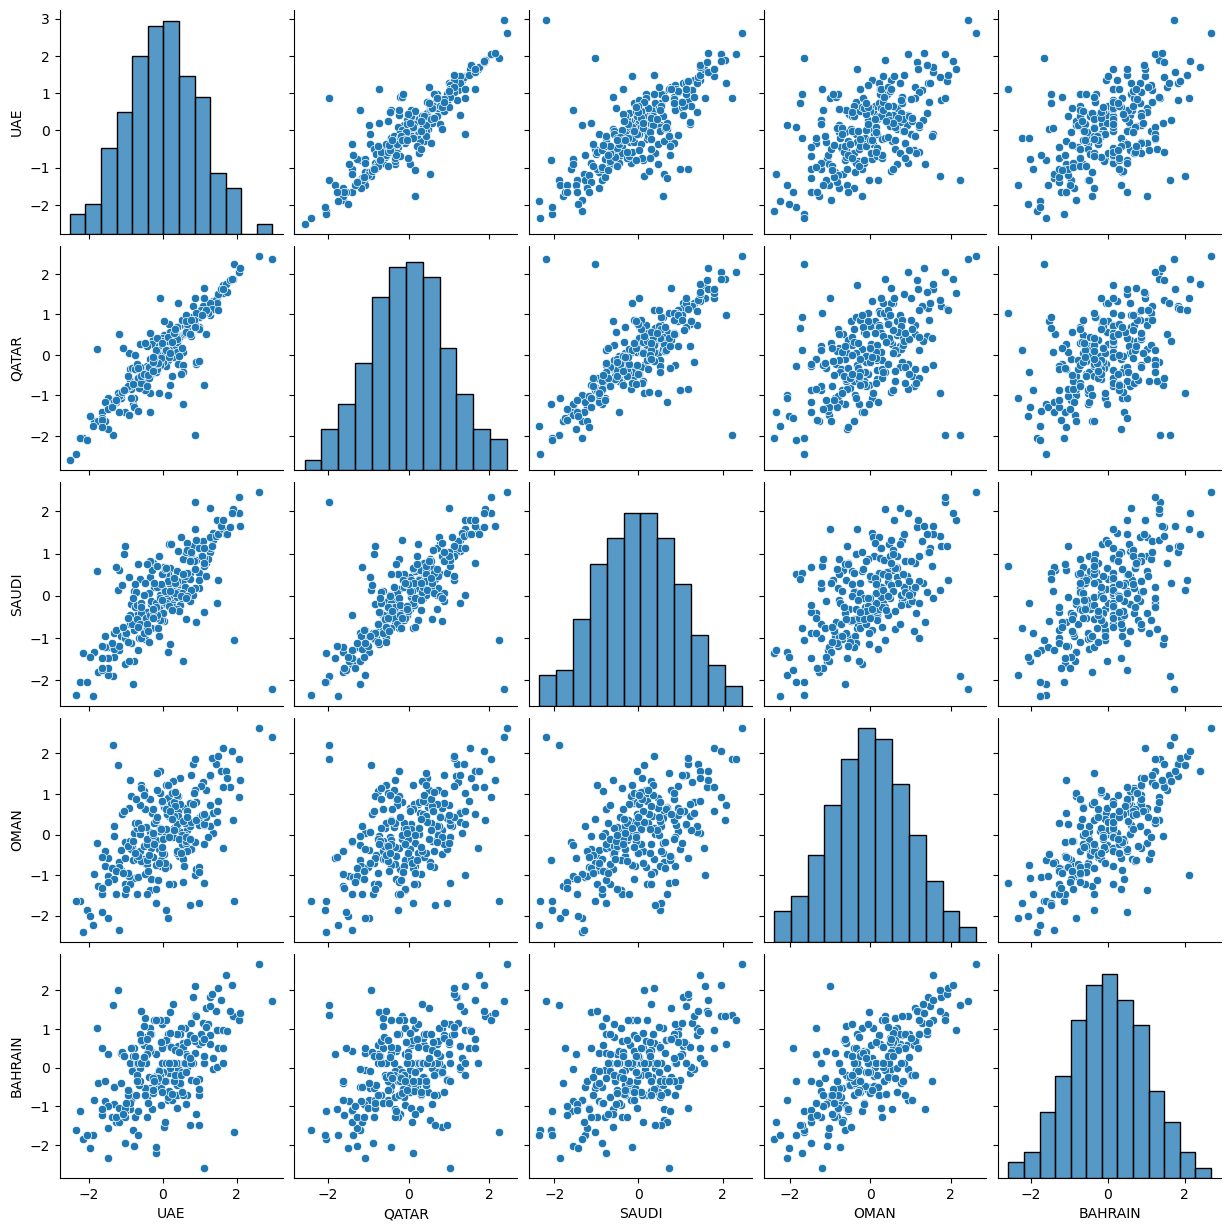

In [8]:
sns.pairplot(Norm_QT)

In [9]:
# Check whether kstest proves their normal distribution
for i in names:
    print(kstest(Norm_QT[i], norm.cdf))

KstestResult(statistic=0.01298239571873383, pvalue=0.9999999999671673, statistic_location=0.9878184749818572, statistic_sign=-1)
KstestResult(statistic=0.01323281425784767, pvalue=0.9999999999158045, statistic_location=-1.0734747071515711, statistic_sign=1)
KstestResult(statistic=0.01226507417993783, pvalue=0.9999999999983913, statistic_location=0.8344254511344863, statistic_sign=-1)
KstestResult(statistic=0.012987012286390098, pvalue=0.9999999999665761, statistic_location=-1.639976263394201, statistic_sign=1)
KstestResult(statistic=0.044733044733044625, pvalue=0.6772262343983992, statistic_location=0.1269374583056433, statistic_sign=1)


In [10]:
Norm_QT.corr(method='pearson')

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.884374,0.720093,0.537262,0.518576
QATAR,0.884374,1.000000,0.761400,0.516185,0.470120
SAUDI,0.720093,0.761400,1.000000,0.532739,0.511675
OMAN,0.537262,0.516185,0.532739,1.000000,0.703451
BAHRAIN,0.518576,0.470120,0.511675,0.703451,1.000000


In [11]:
# linearilized spearman
2*np.sin(np.pi/6*Norm_QT.corr(method='spearman'))

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.870634,0.727647,0.506506,0.500930
QATAR,0.870634,1.000000,0.782757,0.514020,0.458777
SAUDI,0.727647,0.782757,1.000000,0.533845,0.499896
OMAN,0.506506,0.514020,0.533845,1.000000,0.676114
BAHRAIN,0.500930,0.458777,0.499896,0.676114,1.000000


In [12]:
# linearilized kendall tau
np.sin(np.pi/2*Norm_QT.corr(method='kendall'))

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.905063,0.767307,0.523773,0.525724
QATAR,0.905063,1.000000,0.830408,0.533447,0.477372
SAUDI,0.767307,0.830408,1.000000,0.557546,0.518068
OMAN,0.523773,0.533447,0.557546,1.000000,0.700398
BAHRAIN,0.525724,0.477372,0.518068,0.700398,1.000000


### 2. KDE by Matlab

In [13]:
U_matlab = pd.read_csv('Input Data/Matlab uniforms.csv')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


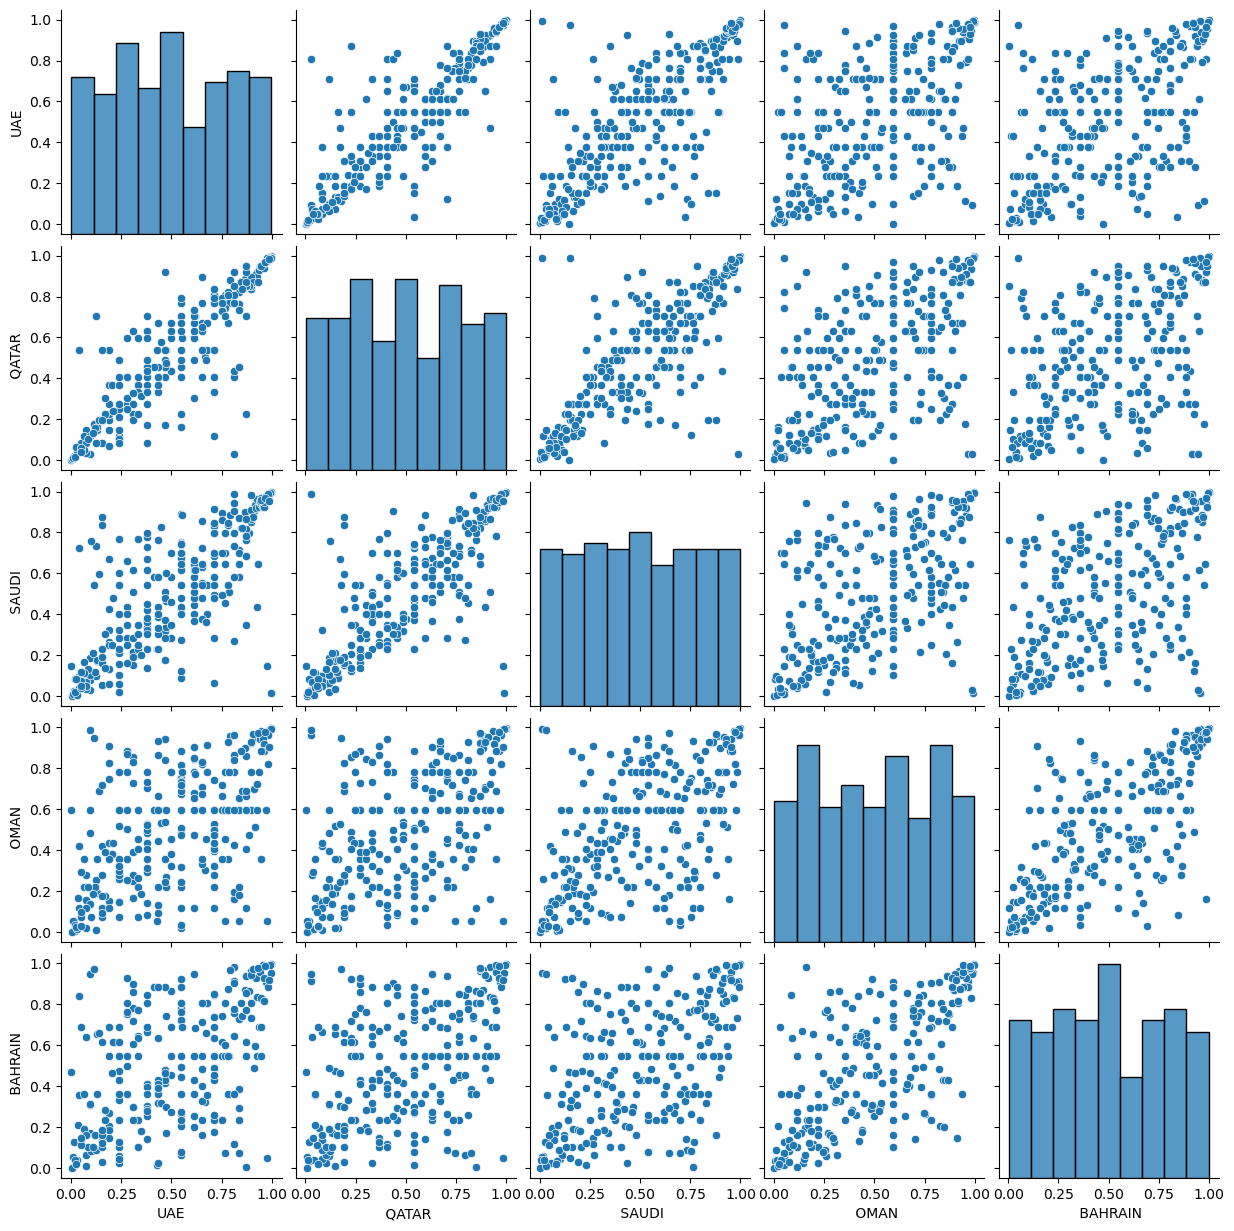

In [14]:
sns.pairplot(U_matlab)

In [15]:
# Check whether kstest proves their uniform distribution
for i in U_matlab.columns:
    print(kstest(U_matlab[i], uniform(loc=0.0, scale=1).cdf))

KstestResult(statistic=0.0414652660634921, pvalue=0.7630111725288782, statistic_location=0.549401774, statistic_sign=-1)
KstestResult(statistic=0.03560216903174607, pvalue=0.895287439356407, statistic_location=0.539570423, statistic_sign=-1)
KstestResult(statistic=0.024793474126984072, pvalue=0.9968275393156781, statistic_location=0.54066649, statistic_sign=-1)
KstestResult(statistic=0.05555398431746039, pvalue=0.40355946840693, statistic_location=0.595236524, statistic_sign=-1)
KstestResult(statistic=0.04762514723809519, pvalue=0.5998918335900136, statistic_location=0.547612948, statistic_sign=1)


In [16]:
Norm_matlab = norm.ppf(U_matlab)
Norm_matlab = pd.DataFrame(Norm_matlab, columns = names)

In [17]:
# Check whether kstest proves their normal distribution
for i in names:
    print(kstest(Norm_matlab[i], norm.cdf))

KstestResult(statistic=0.0414652660634921, pvalue=0.7630111725288782, statistic_location=0.12415007335172049, statistic_sign=-1)
KstestResult(statistic=0.03560216903174607, pvalue=0.895287439356407, statistic_location=0.09935154478611208, statistic_sign=-1)
KstestResult(statistic=0.024793474126984072, pvalue=0.9968275393156781, statistic_location=0.10211295268708706, statistic_sign=-1)
KstestResult(statistic=0.05555398431746039, pvalue=0.40355946840693, statistic_location=0.241036339285437, statistic_sign=-1)
KstestResult(statistic=0.04762514723809519, pvalue=0.5998918335900136, statistic_location=0.11963271374428251, statistic_sign=1)


In [18]:
rho_P = Norm_matlab.corr(method='pearson')
rho_P

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.892030,0.739856,0.549111,0.537390
QATAR,0.892030,1.000000,0.774736,0.536499,0.497217
SAUDI,0.739856,0.774736,1.000000,0.565004,0.544185
OMAN,0.549111,0.536499,0.565004,1.000000,0.722417
BAHRAIN,0.537390,0.497217,0.544185,0.722417,1.000000


In [19]:
# linearilized spearman
rho_S = 2*np.sin(np.pi/6*Norm_matlab.corr(method='spearman'))
rho_S

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.873733,0.736480,0.511791,0.510970
QATAR,0.873733,1.000000,0.789894,0.519192,0.470053
SAUDI,0.736480,0.789894,1.000000,0.545302,0.512188
OMAN,0.511791,0.519192,0.545302,1.000000,0.683988
BAHRAIN,0.510970,0.470053,0.512188,0.683988,1.000000


In [20]:
# linearilized kendall tau
rho_K = np.sin(np.pi/2*Norm_matlab.corr(method='kendall'))
rho_K

,UAE,QATAR,SAUDI,OMAN,BAHRAIN
UAE,1.000000,0.908029,0.775514,0.530738,0.536347
QATAR,0.908029,1.000000,0.836179,0.540086,0.489463
SAUDI,0.775514,0.836179,1.000000,0.570405,0.531988
OMAN,0.530738,0.540086,0.570405,1.000000,0.709366
BAHRAIN,0.536347,0.489463,0.531988,0.709366,1.000000


### 3. Maximum Loglikehood for t copula density

In [21]:
# caclulates log likelihood for each degree of freedom
def log_likelihood(u, df, corr):
    L = 0
    
    for i in range(u.shape[0]):
        L+= np.log(t_copula_density(u[i], df, corr))
        
    return L

In [22]:
# copula density function 
# takes 1x5 array as input, results in a scalar
def t_copula_density(u,df, corr):

    n = np.max(u.shape)

    A = 1/(det(corr)**0.5)*(gamma((df+n)/2)/gamma(df/2))*(gamma(df/2)/gamma((df+1)/2))**n
    B = (1+np.dot(np.dot(t.ppf(u,df).T,inv(corr)),t.ppf(u,df))/df)**(-(df+n)/2)
    C = np.array([(1+t.ppf(u[i],df)**2/df)**(-(df+1)/2)for i in range(n)])

    return A*B / np.prod(C)

In [23]:
# compare estimates, look for maximum log likelihood
# we use Kendall tau corr matrix (d.f at 3)
# the use of Spearman yields d.f. at 2

LL = np.zeros(30)
for i in range(1,31):
    L = log_likelihood(U_matlab.to_numpy(), i, rho_K)
    LL[i-1] = L  
    print("d.f.:", i, "   log likelihood:", L)

d.f.: 1    log likelihood: 518.3430100002541
d.f.: 2    log likelihood: 609.3832321098272
d.f.: 3    log likelihood: 610.3622742858306
d.f.: 4    log likelihood: 602.5069203720594
d.f.: 5    log likelihood: 594.31833788658
d.f.: 6    log likelihood: 587.027255677762
d.f.: 7    log likelihood: 580.6970854802304
d.f.: 8    log likelihood: 575.1911984574887
d.f.: 9    log likelihood: 570.361407495153
d.f.: 10    log likelihood: 566.0834558395221
d.f.: 11    log likelihood: 562.259135175297
d.f.: 12    log likelihood: 558.811739407658
d.f.: 13    log likelihood: 555.6811275476788
d.f.: 14    log likelihood: 552.8196973361738
d.f.: 15    log likelihood: 550.1893399570987
d.f.: 16    log likelihood: 547.7591900815148
d.f.: 17    log likelihood: 545.5039664663669
d.f.: 18    log likelihood: 543.402741840494
d.f.: 19    log likelihood: 541.4380224490001
d.f.: 20    log likelihood: 539.5950520813466
d.f.: 21    log likelihood: 537.8612802129984
d.f.: 22    log likelihood: 536.2259502643374
d.f.

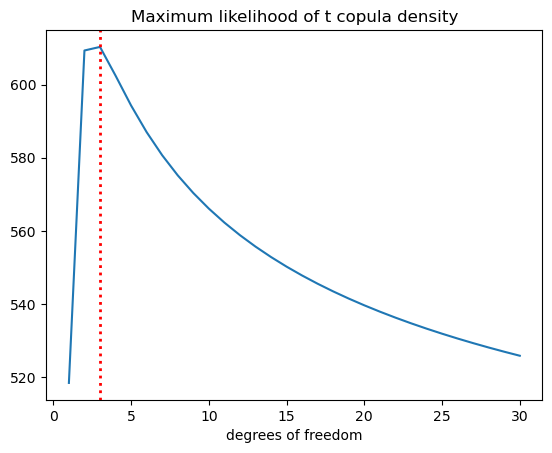

In [24]:
x = np.linspace(1,30,30)

fig, ax = plt.subplots()
plt.plot(x,LL)

plt.title('Maximum likelihood of t copula density')
plt.xlabel('degrees of freedom')

ax.axvline(x=3, color='r', linestyle=':', linewidth=2)
plt.show()

In [25]:
# write person ands kendall correlation matrix
rho_K.to_csv('Kendall corr.csv')
rho_P.to_csv('Pearson corr.csv')